#**Applying KNN Classification on whether the person buy's the computer or not**


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Buys_Comp.csv to Buys_Comp.csv


#Information Regarding Data

*   age => youth(<30),      mid_age(30 to 40), senior(>40)
*   income => high(2), medium(1), low(0)
*   student => yes(1), no(0)
*   credit_rating => fair(1) , excellent(2)





In [58]:
df = pd.read_csv('Buys_Comp.csv')
print(df.head())                

   age  income  student  credit_rating buys_computer  yes_no
0   20       2        0              1            no       0
1   25       2        0              2            no       0
2   35       2        0              1           yes       1
3   50       1        0              2           yes       1
4   55       0        1              1           yes       1


In [60]:
#Mapping the Yes,No with 1 and 0 respectively
Yes_no = dict(zip(df.yes_no.unique(),df.buys_computer.unique()))
Yes_no

{0: 'no', 1: 'yes'}

#Scatter Matrix

<ipython-input-66-f30eebad4344>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


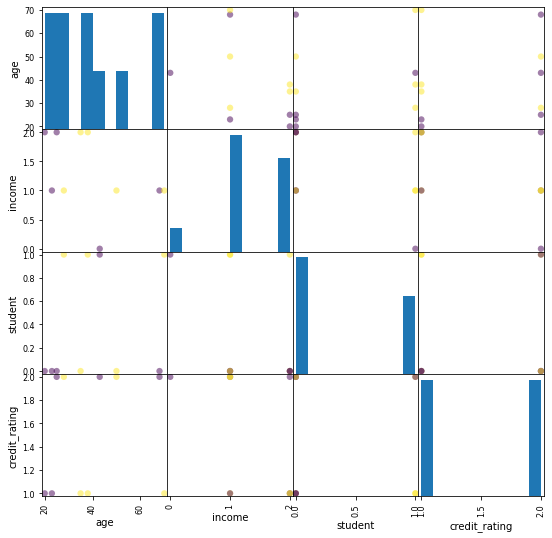

In [66]:
from pandas.plotting import scatter_matrix
x = df[['age','income','student','credit_rating']]
y = df['yes_no']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

cmap = plt.cm.get_cmap('viridis')
scatter = scatter_matrix(x_train, c = y_train, s=40, marker = 'o',figsize=(9,9),cmap=cmap)

#Making 3D Scatter Plot

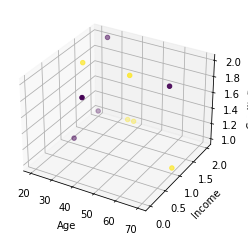

In [82]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x_train['age'],x_train['income'],x_train['credit_rating'], c = y_train, marker='o' )
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Credit_Rating")
plt.show()


#Performing KNN Classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier

x = df[['age','income','student','credit_rating']]
y = df['yes_no']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

#Testing the Accuracy

In [69]:
knn.score(x_test,y_test)

0.75

#Predicting whether the customer buys the computer or not

In [72]:
# Giving Age=33, income = high(2), student = yes(1), credit_rating = fair(1)
ans = knn.predict([[33,2,1,1]])
Yes_no[ans[0]]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'yes'

In [73]:
# Giving Age=20, income = high(2), student = no(0), credit_rating = fair(1)
ans = knn.predict([[20,2,0,1]])
Yes_no[ans[0]]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'no'

#Checking the change in accuracy as per change in 'k' parameters

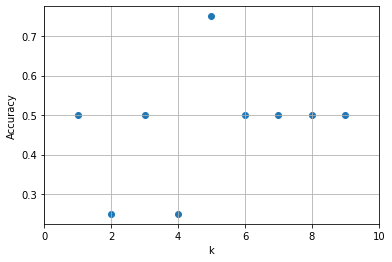

In [79]:
x = df[['age','income','student','credit_rating']]
y = df['yes_no']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

k = range(1,10)
scores = [] 

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  scores.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.scatter(k,scores)
plt.xticks([0,2,4,6,8,10])
plt.grid()